<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-Check." data-toc-modified-id="Data-Check.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Check.</a></span></li><li><span><a href="#Checking-the-Accuracy-of-Enrichment-Efficiency-Calculation." data-toc-modified-id="Checking-the-Accuracy-of-Enrichment-Efficiency-Calculation.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking the Accuracy of Enrichment Efficiency Calculation.</a></span></li><li><span><a href="#Analysis-of-Features-Unavailable-in-the-Test-Set." data-toc-modified-id="Analysis-of-Features-Unavailable-in-the-Test-Set.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis of Features Unavailable in the Test Set.</a></span></li><li><span><a href="#Data-Preprocessing." data-toc-modified-id="Data-Preprocessing.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Preprocessing.</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-various-stages-of-purification." data-toc-modified-id="Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-various-stages-of-purification.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Changes in the concentration of metals (Au, Ag, Pb) at various stages of purification.</a></span></li><li><span><a href="#Comparison-of-the-Raw-Material-Particle-Size-Distribution-in-the-Training-and-Test-Sets." data-toc-modified-id="Comparison-of-the-Raw-Material-Particle-Size-Distribution-in-the-Training-and-Test-Sets.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparison of the Raw Material Particle Size Distribution in the Training and Test Sets.</a></span></li><li><span><a href="#Study-of-the-Total-Concentration-of-All-Substances-at-Different-Stages:-Raw-Material,-Rougher-Concentrate,-and-Final-Concentrate." data-toc-modified-id="Study-of-the-Total-Concentration-of-All-Substances-at-Different-Stages:-Raw-Material,-Rougher-Concentrate,-and-Final-Concentrate.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Study of the Total Concentration of All Substances at Different Stages: Raw Material, Rougher Concentrate, and Final Concentrate.</a></span></li><li><span><a href="#Removing-outliers." data-toc-modified-id="Removing-outliers.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Removing outliers.</a></span></li><li><span><a href="#NANs" data-toc-modified-id="NANs-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>NANs</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Function-for-Calculating-the-Overall-sMAPE." data-toc-modified-id="Function-for-Calculating-the-Overall-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Function for Calculating the Overall sMAPE.</a></span></li><li><span><a href="#Target-features." data-toc-modified-id="Target-features.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Target features.</a></span></li><li><span><a href="#Scaling." data-toc-modified-id="Scaling.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scaling.</a></span></li><li><span><a href="#Learning." data-toc-modified-id="Learning.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Learning.</a></span></li><li><span><a href="#Checking-the-best-model-on-a-test-set.." data-toc-modified-id="Checking-the-best-model-on-a-test-set..-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Checking the best model on a test set..</a></span></li><li><span><a href="#Constant-model." data-toc-modified-id="Constant-model.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Constant model.</a></span></li></ul></li></ul></div>

# Gold Recovery from Ore

Develop a prototype of a machine learning model for "Digits". The company is developing solutions for efficient operation of industrial enterprises.

The model should predict the gold recovery rate from gold-bearing ore. Use data with mining and purification parameters.

The model will help optimize production to avoid launching a facility with unprofitable characteristics.

## Data Preparation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
import math

from scipy import stats as st
from scipy.spatial.distance import pdist, squareform

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import fbeta_score, make_scorer

from sklearn.metrics import (
    mean_squared_error,
    roc_curve,
    roc_auc_score,
    mean_absolute_error
)

from sklearn.impute import KNNImputer

from phik.report import plot_correlation_matrix
from phik import report

In [5]:
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    data_full = pd.read_csv(r"C:\Users\olga.poletkina\OneDrive - HPP Architekten GmbH\GitHub\Practicum_Data_Science\datasets\gold_recovery_full_new.csv")
    data_train = pd.read_csv(r"C:\Users\olga.poletkina\OneDrive - HPP Architekten GmbH\GitHub\Practicum_Data_Science\datasets\gold_recovery_train_new.csv")
    data_test = pd.read_csv(r"C:\Users\olga.poletkina\OneDrive - HPP Architekten GmbH\GitHub\Practicum_Data_Science\datasets\gold_recovery_test_new.csv")

### Data Check.

In [6]:
data_list = {'data_full':data_full, 'data_train':data_train, 'data_test':data_test}

In [7]:
separation_line = '------------------------------------------------------------------------------------------------------'

def data_check(df):
    df.info()
    print(separation_line)
    print('Comtlete duplicates = ', df.duplicated().sum())
    print(separation_line)
    print(df.isna().sum())
    print(df.isna().sum().sum())
    print(separation_line)
#     print(data.describe())
#     print(separation_line)

In [8]:
for key, value in data_list.items():
    print()
    print('***', key, '***')
    print()
    data_check(value)


*** data_full ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               1943

Comtlete duplicates =  0
------------------------------------------------------------------------------------------------------
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                 

### Checking the Accuracy of Enrichment Efficiency Calculation.

**Calculate the enrichment efficiency on the training dataset for the  `rougher.output.recovery` feature. Find the Mean Absolute Error (MAE) between the calculated values and the actual feature values.**

In [9]:
def recovery_func(x):
    final_au = x['rougher.output.concentrate_au'] 
    rougher_au = x['rougher.input.feed_au']
    final_tails = x['rougher.output.tail_au']
    recovery = (final_au * (rougher_au - final_tails)) / (rougher_au * (final_au - final_tails)) * 100
    return recovery

In [10]:
data_train['rougher.output.recovery_calculated'] = data_train.apply(lambda row: recovery_func(row), axis=1)

In [11]:
data_train[['rougher.output.recovery', 'rougher.output.recovery_calculated']].head()

rougher.output.recovery  rougher.output.recovery_calculated
0                87.107763                           87.107763
1                86.843261                           86.843261
2                86.842308                           86.842308
3                87.226430                           87.226430
4                86.688794                           86.688794

In [12]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_calculated'])
print(f'MAE = {mae}')

MAE = 9.73512347450521e-15


In [13]:
data_train = data_train.drop(['rougher.output.recovery_calculated'], axis=1)

**The average absolute deviation, or MAE, between the calculations and the value of the feature in the table is very small, so we can conclude that the feature in the table was calculated correctly.**

### Analysis of Features Unavailable in the Test Set.

In [15]:
missing_columns = []

for column in data_train.columns:
    if column not in data_test.columns:
        missing_columns.append(column)
                
print('The test sample contains the following features:')
for name in data_test.columns:
    print(name)
print(separation_line)
print('The following features are missing in the test sample:')
sorted(missing_columns)

The test sample contains the following features:
date
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**From the data validation above, it can be seen that the missing data is of type float. There are no features with `output` and `calculation` parameter types in the test sample. The assignment contains a comment on this topic - "Some parameters are not available because they are measured and / or calculated much later. Because of this, some features are missing in the test sample that may be in the training one."**

**Data distribution.**

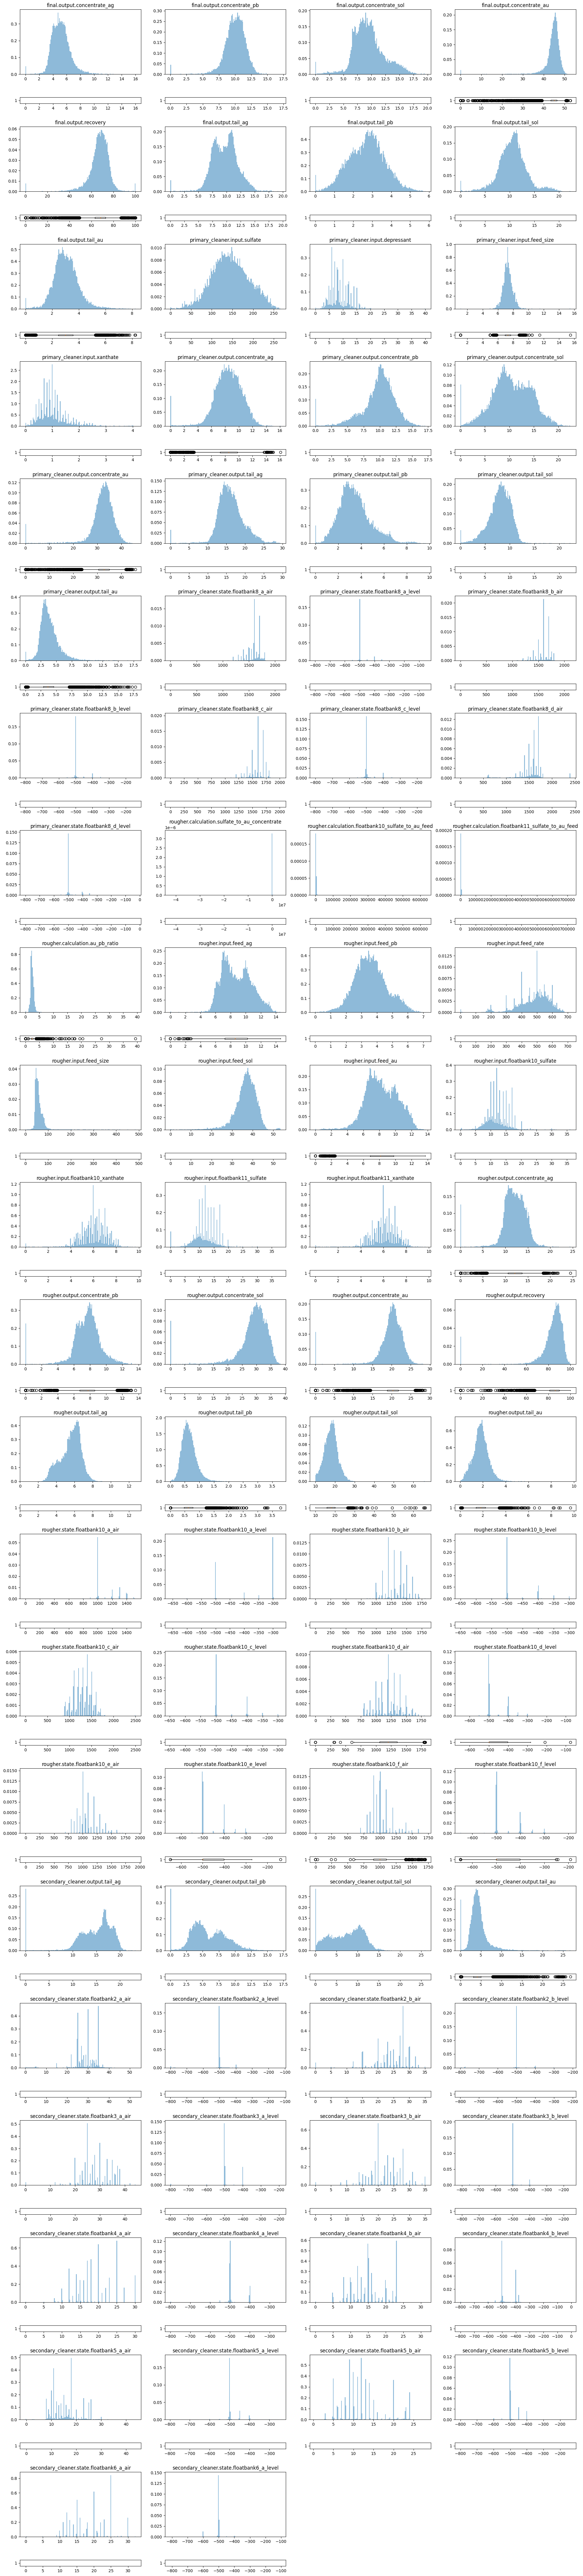

In [19]:
num_cols = len(data_full.columns) - 1
cols_per_row = 4
num_rows = math.ceil(num_cols / cols_per_row)

fig = plt.figure(figsize=(20, num_rows * 4))

for i, column in enumerate(data_full.iloc[:,1:].columns):

    ax1 = plt.subplot2grid((num_rows * 4, cols_per_row), (4 * (i // cols_per_row), i % cols_per_row), rowspan=3)
    ax2 = plt.subplot2grid((num_rows * 4, cols_per_row), (4 * (i // cols_per_row) + 3, i % cols_per_row), rowspan=1, sharex=ax1)

    ax1.hist(data_full[column], bins=150, alpha=0.5, density=True)
    ax1.set_title(column)

    ax2.boxplot(data_full[column], vert=False)
    ax2.set_xlim(ax1.get_xlim())

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

**Based on the distribution analysis, it is evident that there are outliers present in each column. Particularly noteworthy are the distributions with outliers at zero, which draw attention.**

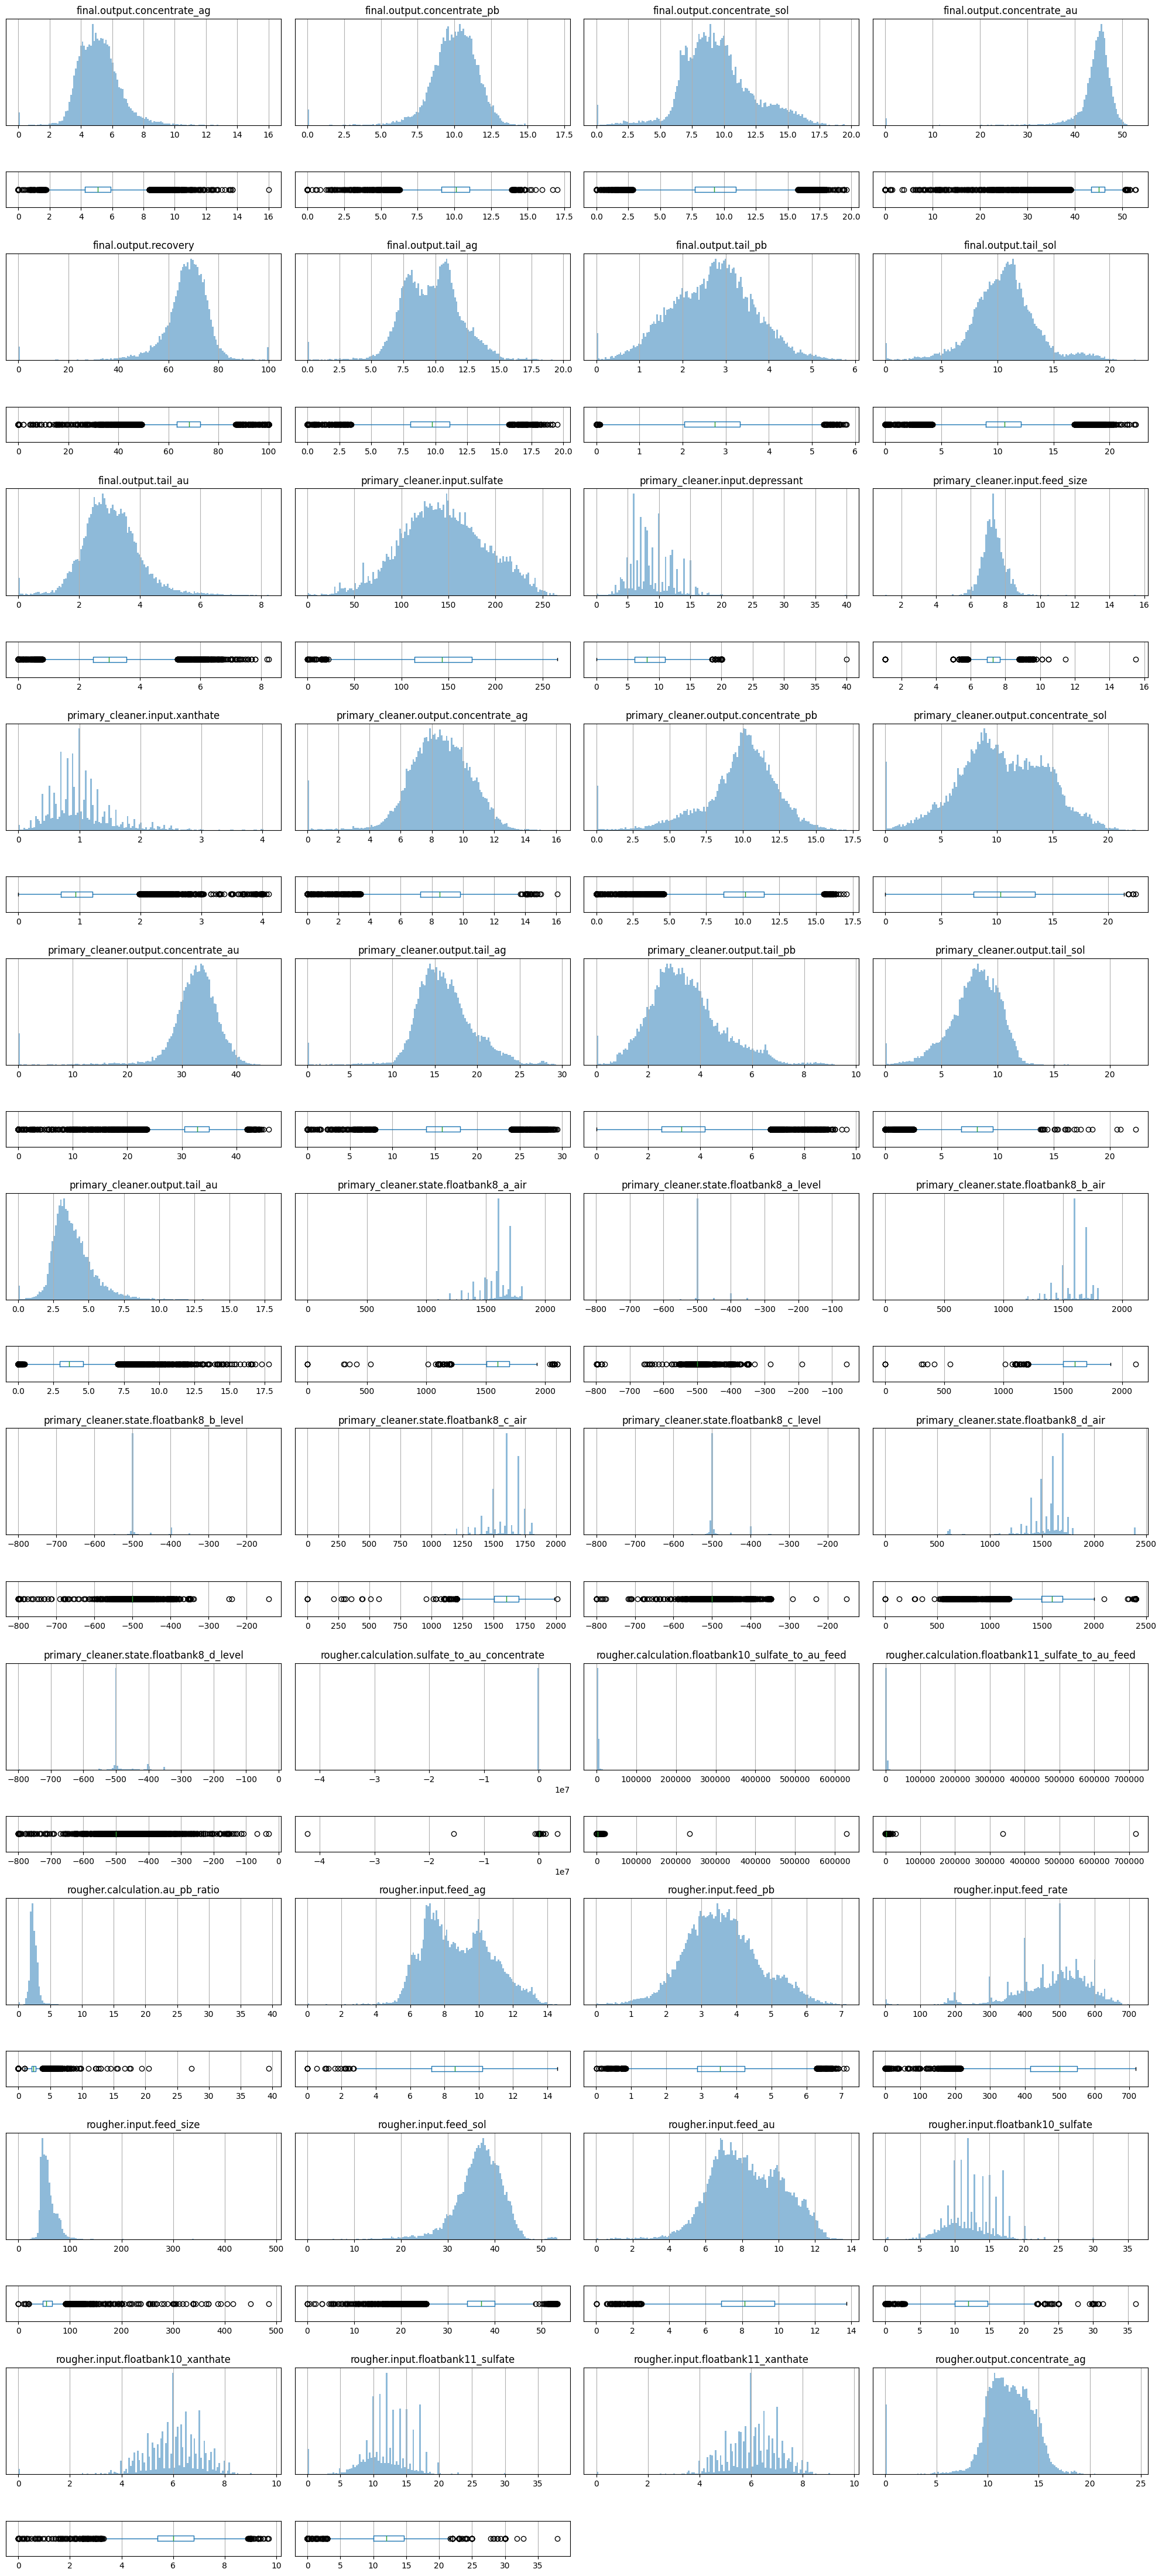

In [27]:
num_cols = len(data_full.columns) - 1
cols_per_row = 4
num_rows = math.ceil(num_cols / cols_per_row) * 2 

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, 
                         figsize=(20, num_rows * 2), 
                         gridspec_kw={'height_ratios': [3, 1] * math.ceil(num_cols / cols_per_row)})

for i, column in enumerate(data_full.iloc[:,1:].columns):

    row_hist = 2 * (i // cols_per_row)
    row_box = row_hist + 1
    col = i % cols_per_row

    ax_hist = axes[row_hist, col]
    data_full[column].hist(bins=150, ax=ax_hist, alpha=0.5)
    ax_hist.set_title(column)
    ax_hist.set_yticks([])

    ax_box = axes[row_box, col]
    data_full[[column]].boxplot(ax=ax_box, vert=False)
    ax_box.set_yticks([])

for i in range(num_cols, num_rows * cols_per_row):
    if i < len(axes.flatten()):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Data Preprocessing.

**Convert the date column into an index**

In [15]:
data_full.set_index('date', inplace=True)

In [16]:
data_train.set_index('date', inplace=True)

In [17]:
data_test.set_index('date', inplace=True)

**Based on the study and preparation of the data, the following actions have been taken:**

- The data was loaded, and the data types were checked. All columns, except for the "date" column, are of type float.
- The data types were not modified, but the "date" column, which can be used to align tables, was converted into indices.
- The calculation of enrichment efficiency was verified, and the Mean Absolute Error (MAE) between the calculated values and the values in the dataset was found to be insignificant. It was concluded that the data calculations were accurate.
- The parameters that are missing in the test set were analyzed. They are all of type float and related to the "output" and "calculation" parameter types.
- It has been decided to handle missing values and outliers after further data analysis.

## Data analysis

### Changes in the concentration of metals (Au, Ag, Pb) at various stages of purification.

In [18]:
data_change_ag = []
data_change_au = []
data_change_pb = []
for column in data_full.columns:
    if 'concentrate_' in column or 'feed_' in column:
        if '_sol' not in column or '_size' not in column or '_rate' not in column:
            if 'ag' in column:
                data_change_ag.append(data_full[column])
            elif 'au' in column:
                data_change_au.append(data_full[column])
            elif 'pb' in column:
                data_change_pb.append(data_full[column])

In [19]:
data_change_ag = pd.DataFrame(data_change_ag).T
data_change_au = pd.DataFrame(data_change_au).T
data_change_pb = pd.DataFrame(data_change_pb).T

In [20]:
order_ag = [
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag'
]
data_change_ag = data_change_ag[order_ag]

order_au = [
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'
]
data_change_au = data_change_au[order_au]

order_pb = [
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb'
]
data_change_pb = data_change_pb[order_pb]

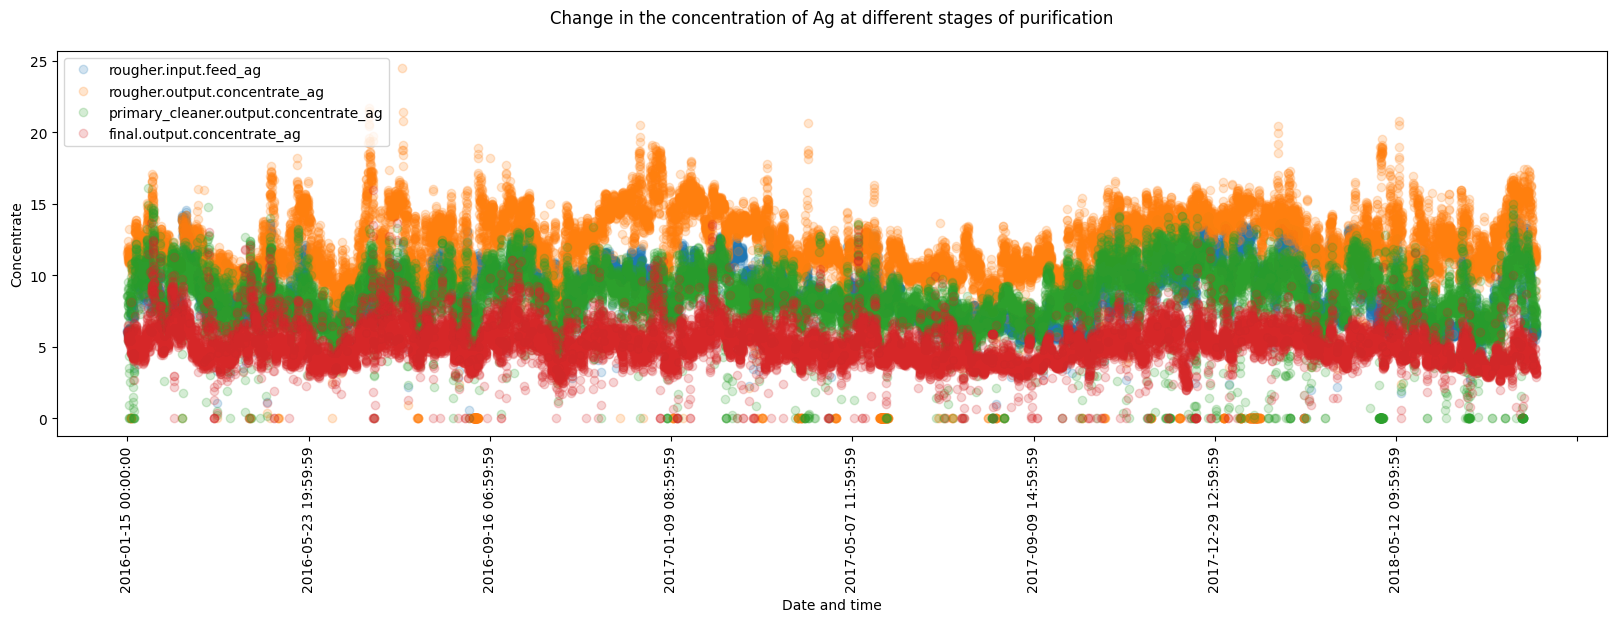

In [21]:
data_change_ag.plot(
    rot=90,
    figsize=(20, 5),
    style='o',
    alpha=0.2
);
plt.xlabel('Date and time')
plt.ylabel('Concentrate')
plt.legend(loc='upper left')
plt.title('Change in the concentration of Ag at different stages of purification', pad=20);

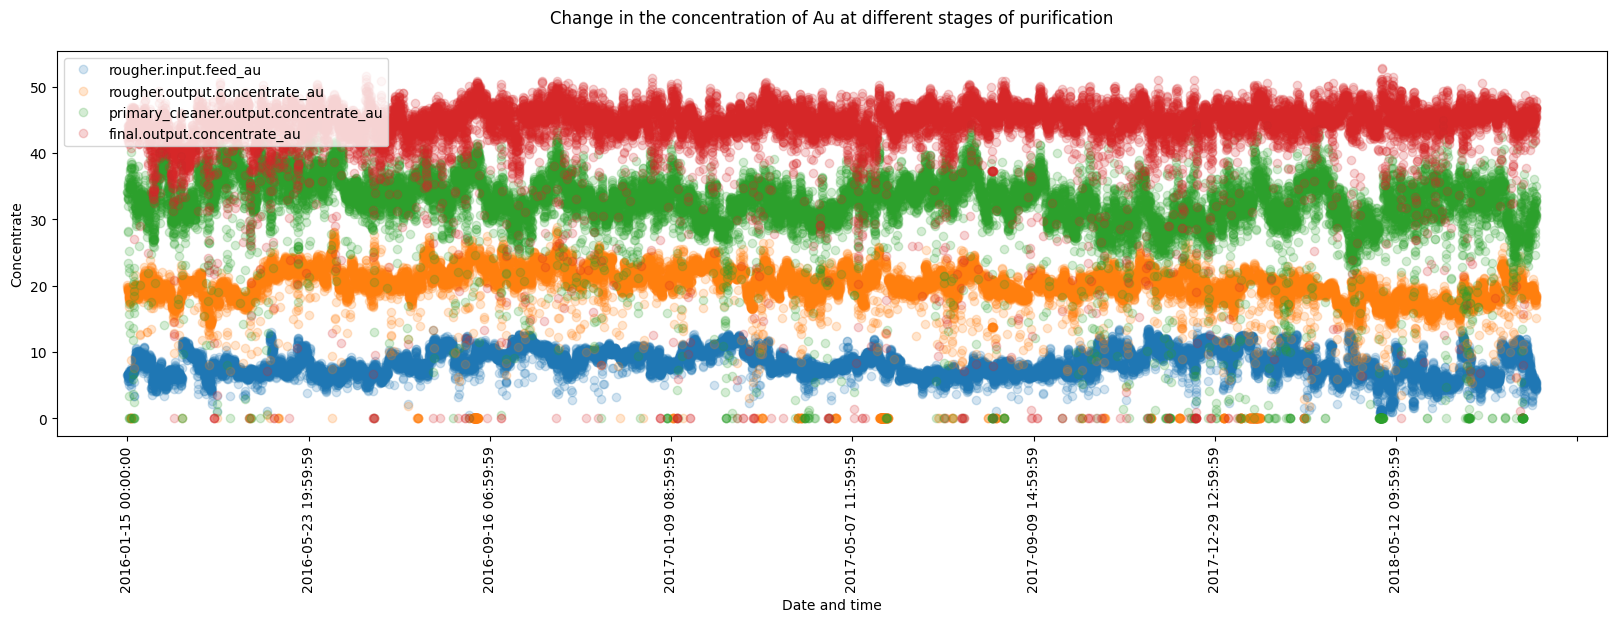

In [22]:
data_change_au.plot(
    rot=90,
    figsize=(20, 5),
    style='o',
    alpha=0.2
);
plt.xlabel('Date and time')
plt.ylabel('Concentrate')
plt.legend(loc='upper left')
plt.title('Change in the concentration of Au at different stages of purification', pad=20);

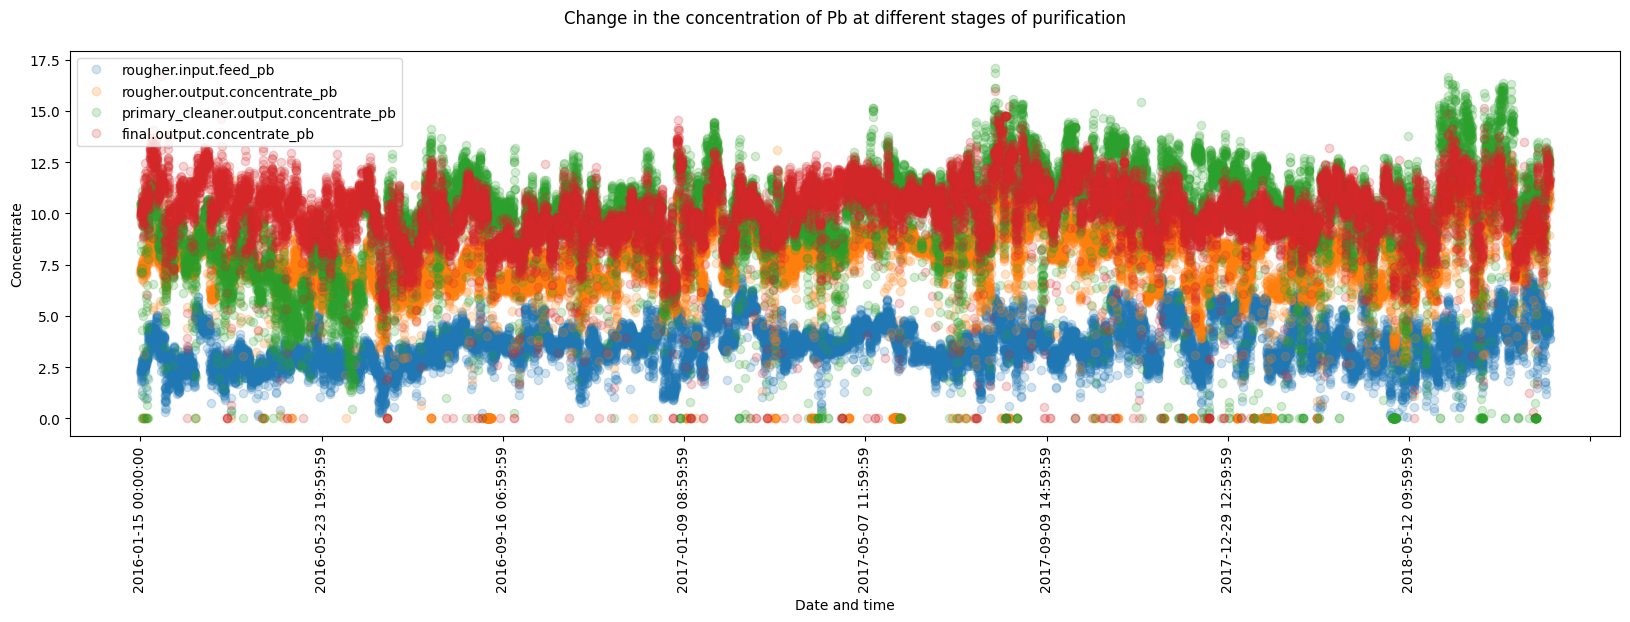

In [23]:
data_change_pb.plot(
    rot=90,
    figsize=(20, 5),
    style='o',
    alpha=0.2
);
plt.xlabel('Date and time')
plt.ylabel('Concentrate')
plt.legend(loc='upper left')
plt.title('Change in the concentration of Pb at different stages of purification', pad=20);

concentration of Ag:
rougher.input.feed_ag                     8.794927
rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168470
dtype: float64

concentration of Au:
rougher.input.feed_au                     8.266097
rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_au    32.119400
final.output.concentrate_au              44.076513
dtype: float64

concentration of Pb:
rougher.input.feed_pb                    3.598085
rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.829530
final.output.concentrate_pb              9.978895
dtype: float64


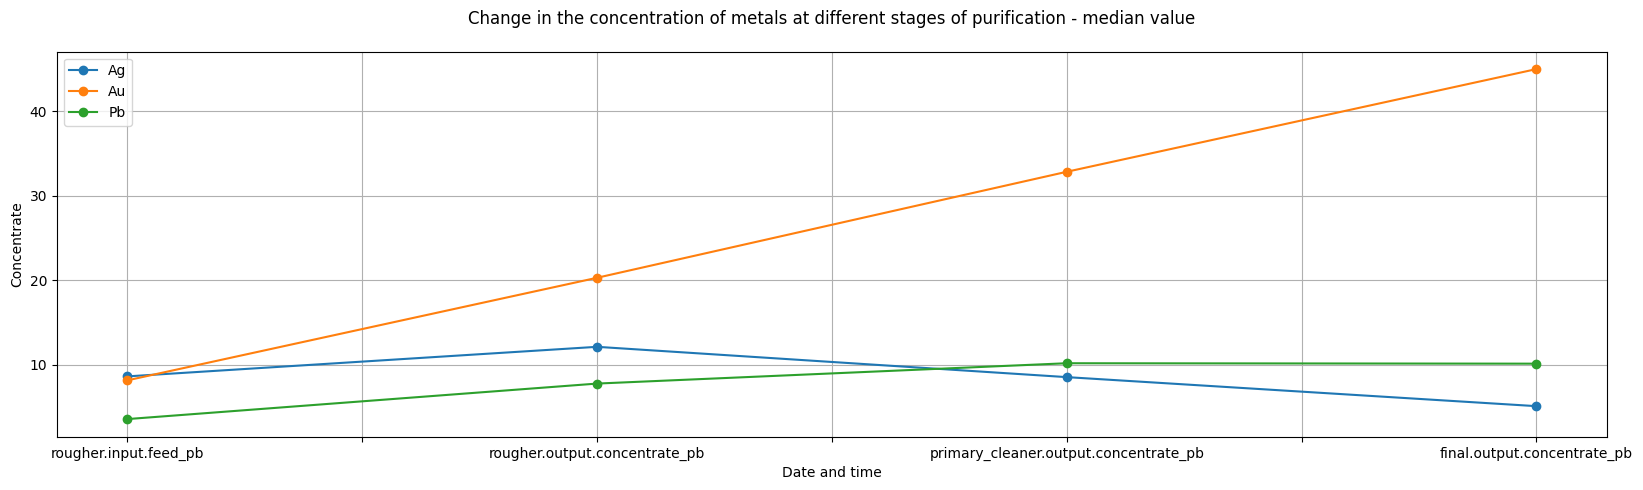

In [24]:
print('concentration of Ag:')
print(data_change_ag.mean(axis=0))
print()
print('concentration of Au:')
print(data_change_au.mean(axis=0))
print()
print('concentration of Pb:')
print(data_change_pb.mean(axis=0))

data_change_ag.median().plot(
    figsize=(20, 5),
    style='o-',
    label='Ag',
    grid=True
);
data_change_au.median().plot(
    figsize=(20, 5),
    style='o-',
    label='Au',
    grid=True
);
data_change_pb.median().plot(
    figsize=(20, 5),
    style='o-',
    label='Pb',
    grid=True
);

plt.xlabel('Date and time')
plt.ylabel('Concentrate')
plt.legend()
# plt.invert_yaxis()
plt.title('Change in the concentration of metals at different stages of purification - median value', pad=20);

**Conclusions on checking the concentration of metals:**
- the concentration of Au (gold) from the initial to the final processing is progressively increasing.
- the concentration of Ag (silver) progressively decreases from the initial to the final treatment.
- the concentration of Pb (lead) increased during the first cleaning and remained approximately at the same level in the final.

### Comparison of the Raw Material Particle Size Distribution in the Training and Test Sets.

 **If the distributions are very different from each other, the estimation of the model will be wrong.**

In [25]:
data_train_feed_size = []
for column in data_train.columns:
    if 'feed_size' in column:
        data_train_feed_size.append(data_train[column])

data_test_feed_size = []
for column in data_test.columns:
    if 'feed_size' in column:
        data_test_feed_size.append(data_test[column])
        
data_train_feed_size = pd.DataFrame(data_train_feed_size).T
data_test_feed_size = pd.DataFrame(data_test_feed_size).T

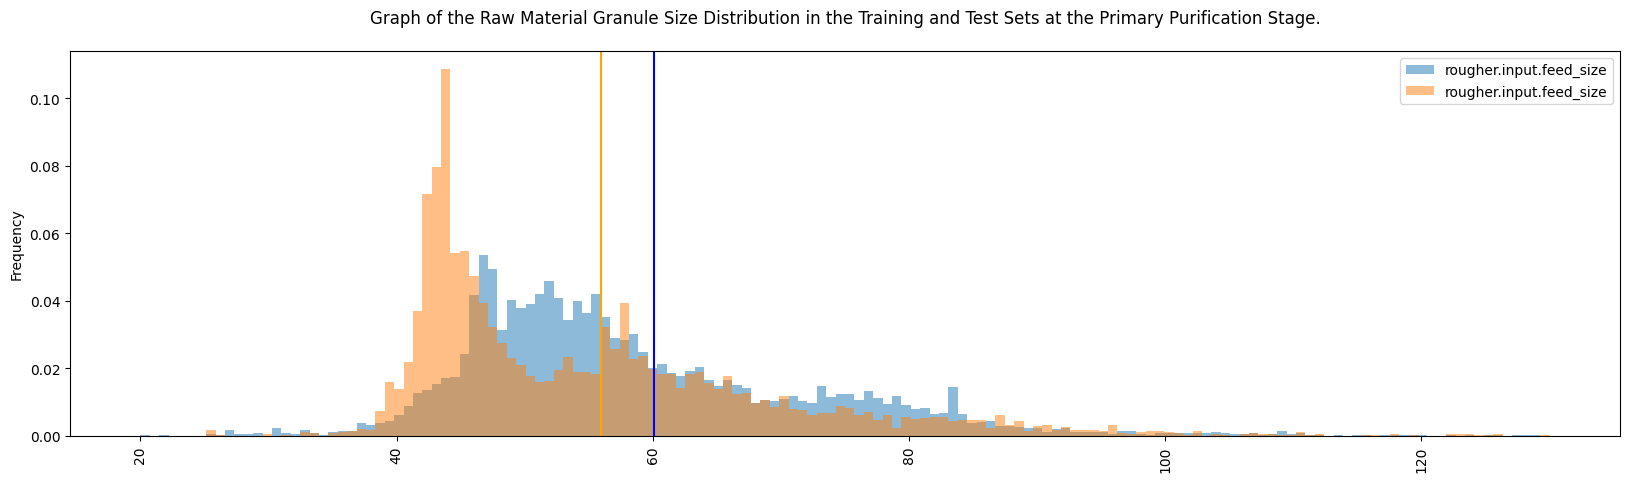

In [26]:
ax = data_train_feed_size.iloc[:,1].plot(
    kind='hist',
    bins=150,
    rot=90,
    figsize=(20, 5),
    alpha=0.5,
    range=(20, 130),
    density=True
);
data_test_feed_size.iloc[:,1].plot(
    kind='hist',
    bins=150,
    rot=90,
    figsize=(20, 5),
    alpha=0.5,
    ax=ax,
    range=(20, 130),
    density=True
);
plt.legend()
plt.axvline(data_train_feed_size.iloc[:,1].mean(), color ='blue')
plt.axvline(data_test_feed_size.iloc[:,1].mean(), color ='orange')
plt.title('Graph of the Raw Material Granule Size Distribution in the Training and Test Sets at the Primary Purification Stage.', pad=20);
plt.show()

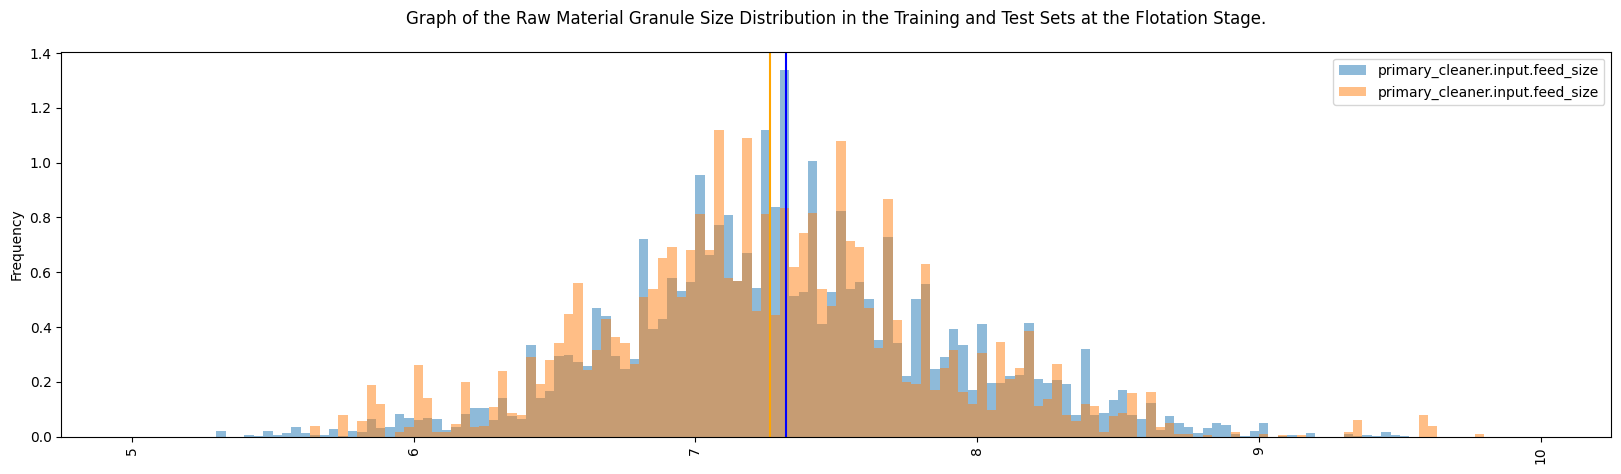

In [27]:
ax = data_train_feed_size.iloc[:,0].plot(
    kind='hist',
    bins=150,
    rot=90,
    figsize=(20, 5),
    alpha=0.5,
    range=(5, 10),
    density=True
);
data_test_feed_size.iloc[:,0].plot(
    kind='hist',
    bins=150,
    rot=90,
    figsize=(20, 5),
    alpha=0.5,
    ax=ax,
    range=(5, 10),
    density=True
);

plt.legend()
plt.axvline(data_train_feed_size.iloc[:,0].mean(), color ='blue')
plt.axvline(data_test_feed_size.iloc[:,0].mean(), color ='orange')
plt.title('Graph of the Raw Material Granule Size Distribution in the Training and Test Sets at the Flotation Stage.', pad=20);
plt.show()

**Conclusions on the distribution of raw material granule sizes:**

Visually, based on the graphs, it can be inferred that the distributions are not significantly different from each other.

In [28]:
data_test_feed_size.head()

primary_cleaner.input.feed_size  rougher.input.feed_size
date                                                                         
2016-09-01 00:59:59                         8.080000                62.710452
2016-09-01 01:59:59                         8.080000                61.961163
2016-09-01 02:59:59                         7.786667                66.903807
2016-09-01 03:59:59                         7.640000                59.865919
2016-09-01 04:59:59                         7.530000                63.315324

In [29]:
data_train_feed_size.head()

primary_cleaner.input.feed_size  rougher.input.feed_size
date                                                                         
2016-01-15 00:00:00                             7.25                55.486599
2016-01-15 01:00:00                             7.25                57.278666
2016-01-15 02:00:00                             7.25                57.510649
2016-01-15 03:00:00                             7.25                57.792734
2016-01-15 04:00:00                             7.25                56.047189

In [30]:
from scipy.stats import ttest_ind

t_statistic_r, p_value_r = ttest_ind(data_train_feed_size.iloc[:,1].dropna().values, data_test_feed_size.iloc[:,1].dropna().values, equal_var=False)
t_statistic_f, p_value_f = ttest_ind(data_train_feed_size.iloc[:,0].dropna().values, data_test_feed_size.iloc[:,0].dropna().values, equal_var=False)

print('T-статистика_rougher: ', t_statistic_r)
print('P-value_rougher: ', p_value_r)
print(round(p_value_r, 5))
print()
print('T-статистика_primary_cleaner: ', t_statistic_f)
print('P-value_primary_cleaner: ', p_value_f)
print(round(p_value_f, 5))

T-статистика_rougher:  12.852792510809406
P-value_rougher:  1.5360283753498475e-37
0.0

T-статистика_primary_cleaner:  5.6817691264522585
P-value_primary_cleaner:  1.3721938409942596e-08
0.0


### Study of the Total Concentration of All Substances at Different Stages: Raw Material, Rougher Concentrate, and Final Concentrate.

In [31]:
%%script echo skipping

data_change_sol = []
for column in data_full.columns:
    if 'concentrate_' in column or 'feed_' in column:
        if '_size' not in column or '_rate' not in column:
            if 'sol' in column:
                data_change_sol.append(data_full[column])

Couldn't find program: 'echo'


In [32]:
%%script echo skipping

data_change_sol = pd.DataFrame(data_change_sol).T

Couldn't find program: 'echo'


In [33]:
%%script echo skipping

order_sol = [
    'rougher.input.feed_sol', 
    'rougher.output.concentrate_sol',
    'primary_cleaner.output.concentrate_sol',
    'final.output.concentrate_sol'
]
data_change_sol = data_change_sol[order_sol]

Couldn't find program: 'echo'


In [34]:
%%script echo skipping

total_concentrate_list = [data_change_sol, data_change_ag, data_change_au, data_change_pb]

Couldn't find program: 'echo'


In [35]:
total_concentrate_list = [data_change_ag, data_change_au, data_change_pb]

In [36]:
total_concentrait_count = []
for some_list in total_concentrate_list:
    df = 0
    for i in range(0, 4):
        df = some_list.iloc[:,i]
        total_concentrait_count.append(df)

In [37]:
total_concentrait_count = pd.DataFrame(total_concentrait_count).T

In [38]:
rougher_input = total_concentrait_count.filter(like='rougher.input')
rougher_output = total_concentrait_count.filter(like='rougher.output')
primary_cleaner_output = total_concentrait_count.filter(like='primary_cleaner.output')
final_output = total_concentrait_count.filter(like='final.output')

In [39]:
data = {
    'rougher_input':rougher_input.sum(axis=1),
    'rougher_output':rougher_output.sum(axis=1),
    'primary_cleaner_output':primary_cleaner_output.sum(axis=1),
    'final_output':final_output.sum(axis=1)
}
total_concentrait_sum = pd.DataFrame(data)

In [40]:
total_concentrait_sum.describe()

rougher_input  rougher_output  primary_cleaner_output  final_output
count   19439.000000    19439.000000            19439.000000  19439.000000
mean       20.640600       39.373032               50.332682     59.223099
std         4.494362        6.863389                7.671672      6.097603
min         0.030000        0.000000                0.000000      0.000000
25%        17.252879       38.394639               50.038524     59.298323
50%        20.141216       40.312648               51.905758     60.306921
75%        23.797381       42.365102               53.386172     61.096667
max        33.498784       55.568687               60.269003     64.968881

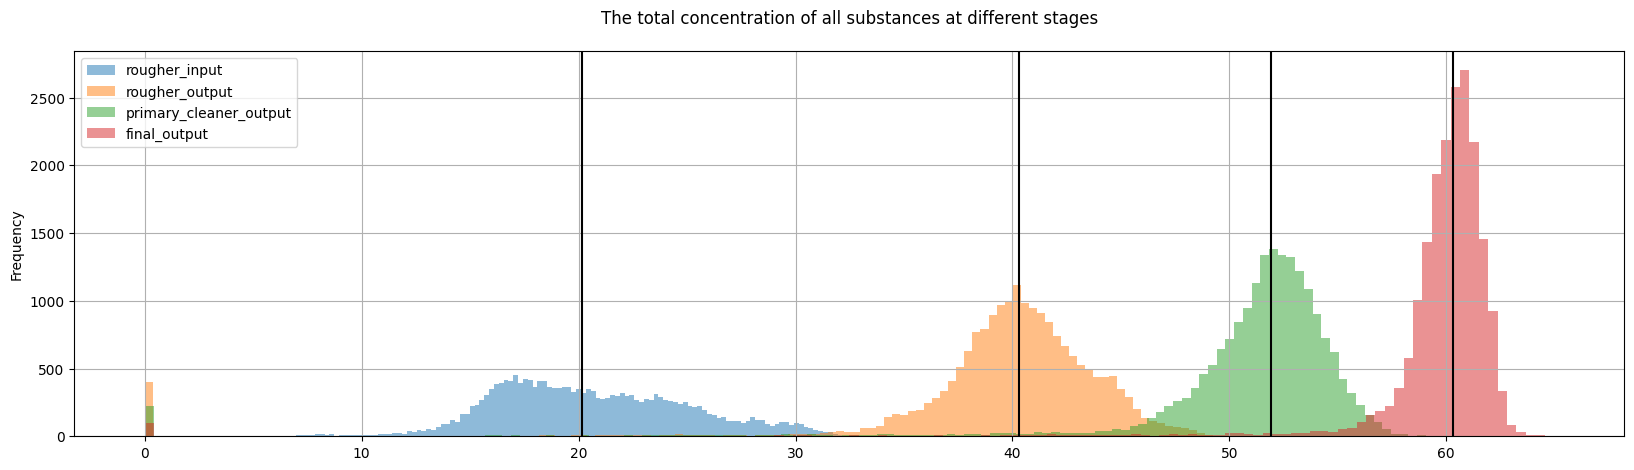

In [41]:
for column in total_concentrait_sum.columns:
    total_concentrait_sum[column].plot(
        kind='hist',
        bins=150,
        figsize=(20, 5),
        alpha=0.5,
        grid=True
    )
    plt.legend(loc='upper left')
    plt.title('The total concentration of all substances at different stages', pad=20)
    plt.axvline(total_concentrait_sum[column].median(), color ='black')

**Conclusions on total concentration:**
- there are outliers near zero, apparently these are incorrect data that could have been obtained in the process of incorrect measurements. Rows with null values are removed from the selection.
- the graphs show how the total concentration increases with each successive stage.

### Removing outliers.

In [42]:
data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_au'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_ag'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_pb'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_sol'] < 1].index, axis = 0)

data_full = data_full.drop(index = data_full[data_full['rougher.output.concentrate_au'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.output.concentrate_ag'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.output.concentrate_pb'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['rougher.output.concentrate_sol'] < 1].index, axis = 0)

data_full = data_full.drop(index = data_full[data_full['primary_cleaner.output.concentrate_au'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['primary_cleaner.output.concentrate_ag'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['primary_cleaner.output.concentrate_pb'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['primary_cleaner.output.concentrate_sol'] < 1].index, axis = 0)

data_full = data_full.drop(index = data_full[data_full['final.output.concentrate_au'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['final.output.concentrate_ag'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['final.output.concentrate_pb'] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full['final.output.concentrate_sol'] < 1].index, axis = 0)

In [43]:
ind_to_remove_tr = []
for index, row in data_train.iterrows():
    if index not in data_full.index:
        ind_to_remove_tr.append(index)
print('count indexes to remove: ', len(ind_to_remove_tr))
print('len before: ', len(data_train))

data_train = data_train.drop(ind_to_remove_tr)
print('len after: ', len(data_train))

count indexes to remove:  723
len before:  14149
len after:  13426


In [44]:
ind_to_remove_te = []
for index, row in data_test.iterrows():
    if index not in data_full.index:
        ind_to_remove_te.append(index)
print('count indexes to remove: ', len(ind_to_remove_te))
print('len before: ', len(data_test))

data_test = data_test.drop(ind_to_remove_te)
print('len after: ', len(data_test))

count indexes to remove:  193
len before:  5290
len after:  5097


### NANs

In [45]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')

In [46]:
features_train = data_train.drop(columns=missing_columns)
features_test = data_test.copy()

In [47]:
features_train_imputed = pd.DataFrame(imputer.fit_transform(features_train), columns=features_train.columns, index=features_train.index)

In [48]:
features_test_imputed = pd.DataFrame(imputer.transform(features_test), columns=features_test.columns, index=features_test.index)

In [49]:
data_list = {'data_full':data_full, 'data_train':features_train_imputed, 'data_test':features_test_imputed}

## Models

### Function for Calculating the Overall sMAPE.

In [50]:
def sMAPE_calculation(y_target, y_predict):
    return np.mean(abs(y_target - y_predict) / ((abs(y_target) + abs(y_predict)) / 2)) * 100

In [51]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [52]:
my_score = make_scorer(sMAPE_calculation, greater_is_better=False)

### Target features.

In [53]:
train_target_rougher = data_train['rougher.output.recovery']
train_target_final = data_train['final.output.recovery']

In [54]:
print(data_full['rougher.output.recovery'].isna().sum())
print(data_full['final.output.recovery'].isna().sum())

0
0


In [55]:
data_test = pd.merge(data_test, data_full[['rougher.output.recovery', 'final.output.recovery']], left_index=True, right_index=True)

In [56]:
test_target_rougher = data_test['rougher.output.recovery']
test_target_final = data_test['final.output.recovery']

### Scaling.

In [57]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_test)

### Learning.

**Models and hyperparameters. Models used in training:**
- LinearRegression()
- DecisionTreeRegressor()
- RandomForestRegressor()

In [58]:
warnings.filterwarnings("ignore")

model_reg = LinearRegression()

hyperparameters_reg = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

model_tree = DecisionTreeRegressor()

hyperparameters_tree = {
    'max_depth': [1, 30],
    'random_state': [12345]
}

model_forest = RandomForestRegressor()

hyperparameters_forest = {
    'n_estimators': [20, 80],
    'max_depth': [1, 10],
    'random_state': [12345]
}

In [59]:
print("Hyperparameter tuning for the first target feature - train_target_rougher")
print()
grid_search_reg_rougher = GridSearchCV(model_reg, param_grid=hyperparameters_reg, cv=5, scoring=my_score)
grid_search_reg_rougher.fit(features_train_imputed, train_target_rougher)
print("Best hyperparameters for linear regression: ", grid_search_reg_rougher.best_params_)

grid_search_tree_rougher = GridSearchCV(model_tree, param_grid=hyperparameters_tree, cv=5, scoring=my_score)
grid_search_tree_rougher.fit(features_train_imputed, train_target_rougher)
print("Best hyperparameters for decision tree: ", grid_search_tree_rougher.best_params_)

grid_search_forest_rougher = GridSearchCV(model_forest, param_grid=hyperparameters_forest, cv=5, scoring=my_score)
grid_search_forest_rougher.fit(features_train_imputed, train_target_rougher)
print("Best hyperparameters for random forest: ", grid_search_forest_rougher.best_params_)

print(separation_line)
print()
print("Hyperparameter tuning for the second target feature - train_target_final")
print()

grid_search_reg_final = GridSearchCV(model_reg, param_grid=hyperparameters_reg, cv=5, scoring=my_score)
grid_search_reg_final.fit(features_train_imputed, train_target_final)
print("Best hyperparameters for linear regression: ", grid_search_reg_final.best_params_)

grid_search_tree_final = GridSearchCV(model_tree, param_grid=hyperparameters_tree, cv=5, scoring=my_score)
grid_search_tree_final.fit(features_train_imputed, train_target_final)
print("Best hyperparameters for decision tree: ", grid_search_tree_final.best_params_)

grid_search_forest_final = GridSearchCV(model_forest, param_grid=hyperparameters_forest, cv=5, scoring=my_score)
grid_search_forest_final.fit(features_train_imputed, train_target_final)
print("Best hyperparameters for random forest: ", grid_search_forest_final.best_params_)


Hyperparameter tuning for the first target feature - train_target_rougher

Best hyperparameters for linear regression:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best hyperparameters for decision tree:  {'max_depth': 1, 'random_state': 12345}
Best hyperparameters for random forest:  {'max_depth': 10, 'n_estimators': 80, 'random_state': 12345}
------------------------------------------------------------------------------------------------------

Hyperparameter tuning for the second target feature - train_target_final

Best hyperparameters for linear regression:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best hyperparameters for decision tree:  {'max_depth': 1, 'random_state': 12345}
Best hyperparameters for random forest:  {'max_depth': 10, 'n_estimators': 80, 'random_state': 12345}


In [60]:
grid_search_reg_rougher.fit(features_train_imputed, train_target_rougher)
grid_search_tree_rougher.fit(features_train_imputed, train_target_rougher)
grid_search_forest_rougher.fit(features_train_imputed, train_target_rougher)

grid_search_reg_final.fit(features_train_imputed, train_target_final)
grid_search_tree_final.fit(features_train_imputed, train_target_final)
grid_search_forest_final.fit(features_train_imputed, train_target_final)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 10], 'n_estimators': [20, 80],
                         'random_state': [12345]},
             scoring=make_scorer(sMAPE_calculation, greater_is_better=False))

In [61]:
best_score_reg_rougher = grid_search_reg_rougher.best_score_
print("Score of LinearRegression() model for the rougher feature: ", best_score_reg_rougher)

best_score_tree_rougher = grid_search_tree_rougher.best_score_
print("Score of DecisionTreeRegressor() model for the rougher feature: ", best_score_tree_rougher)

best_score_forest_rougher = grid_search_forest_rougher.best_score_
print("Score of RandomForestRegressor() model for the rougher feature: ", best_score_forest_rougher)

print()

best_score_reg_final = grid_search_reg_final.best_score_
print("Score of LinearRegression() model for the final feature: ", best_score_reg_final)

best_score_tree_final = grid_search_tree_final.best_score_
print("Score of DecisionTreeRegressor() model for the final feature: ", best_score_tree_final)

best_score_forest_final = grid_search_forest_final.best_score_
print("Score of RandomForestRegressor() model for the final feature: ", best_score_forest_final)

Score of LinearRegression() model for the rougher feature:  -7.1591611400099335
Score of DecisionTreeRegressor() model for the rougher feature:  -7.962775684631012
Score of RandomForestRegressor() model for the rougher feature:  -6.527909960302499

Score of LinearRegression() model for the final feature:  -10.710783243201549
Score of DecisionTreeRegressor() model for the final feature:  -9.502981849929913
Score of RandomForestRegressor() model for the final feature:  -9.295114978970577


**The best score in both cases is shown by the RandomForestRegressor() model.**

**Calculate the final sMAPE(symmetric mean absolute percentage deviation) error for all models.**

In [62]:
final_smape_reg = final_sMAPE(best_score_reg_rougher, best_score_reg_final)
print('LinearRegression final sMAPE =', final_smape_reg)

final_smape_tree = final_sMAPE(best_score_tree_rougher, best_score_tree_final)
print('DecisionTreeRegressor final sMAPE =', final_smape_tree)

final_smape_forest = final_sMAPE(best_score_forest_rougher, best_score_forest_final)
print('RandomForestRegressor final sMAPE =', final_smape_forest)

LinearRegression final sMAPE = -9.822877717403646
DecisionTreeRegressor final sMAPE = -9.117930308605189
RandomForestRegressor final sMAPE = -8.603313724303558


**Minimum error on RandomForestRegressor().**

### Checking the best model on a test set..

In [63]:
features_test_imputed
test_target_rougher
test_target_final

test_rougher = grid_search_forest_rougher.predict(features_test_imputed)
test_final = grid_search_forest_final.predict(features_test_imputed)

rouger_smape = sMAPE_calculation(test_target_rougher, test_rougher)
final_smape = sMAPE_calculation(test_target_final, test_final)

final_sMAPE_test = final_sMAPE(rouger_smape, final_smape)
print('Итоговое sMAPE на модели RandomForestRegressor() = ', final_sMAPE_test)

Итоговое sMAPE на модели RandomForestRegressor() =  7.10548240492631


**The final symmetric mean absolute percentage deviation on the test sample is 7.105.**

### Constant model.

In [64]:
from sklearn.dummy import DummyRegressor

In [65]:
dummy_r = DummyRegressor(strategy='mean')
dummy_f = DummyRegressor(strategy='mean')

dummy_r.fit(features_train_imputed, train_target_rougher)
dummy_f.fit(features_train_imputed, train_target_final)

rougher = dummy_r.predict(features_test_imputed)
final = dummy_f.predict(features_test_imputed)

In [66]:
rouger_smape_dummy = sMAPE_calculation(test_target_rougher, rougher)
final_smape_dummy = sMAPE_calculation(test_target_final, final)

In [67]:
final_sMAPE_test_dummy = final_sMAPE(rouger_smape_dummy, final_smape_dummy)
print('finaе sMAPE on Constant model  = ', final_sMAPE_test_dummy)

finaе sMAPE on Constant model  =  7.658487159367311


**Conclusions on the models and results:**

- Functions for calculating the Symmetric Mean Absolute Percentage Error (sMAPE) were created. sMAPE measures the percentage deviation of predictions from actual values, taking into account deviations in both directions.
- The target features were added to the test dataset, and a preliminary check for NaN values was performed.
- Scaling was conducted using StandardScaler().
- Three models were chosen for investigation: LinearRegression(), DecisionTreeRegressor(), and RandomForestRegressor().
- Hyperparameter tuning and scoring were performed using the GridSearchCV tool.
- Model evaluation was conducted using the best_score_ attribute.
- Based on the final_sMAPE evaluation, the RandomForestRegressor model demonstrated the best quality (final sMAPE = -8.603313724303558).
- On the test dataset, the RandomForestRegressor() model achieved an sMAPE of 7.1054824049263114.
- A dummy model, DummyRegressor(strategy='mean'), was created as a baseline, and it performed worse than the RandomForestRegressor model.